In [8]:
import numpy as np
import math
import re
import time
import matplotlib.pyplot as plt

In [9]:
data_path = "/content/drive/MyDrive/adventofcode/2021/data_13.txt"

def parse_file(data_path):
    with open(data_path) as f:
        lines = f.read().splitlines()
        coords, folds = lines[0:lines.index("")], lines[lines.index("")+1:]
        coords = [[int(number) for number in coord.split(",")][::-1] for coord in coords]
        folds = [[char if char in ["x","y"] else int(char) for char in group] for group in [re.search(r"([yx]).+(\b\d+)", fold).groups() for fold in folds]]
    return coords, folds


[[126, 688], [406, 1237], [327, 1228], [189, 827], [457, 132], [120, 641], [579, 1255], [187, 1310], [166, 371], [332, 576], [835, 1207], [595, 746], [5, 468], [282, 428], [446, 540], [393, 1253], [701, 788], [387, 1034], [526, 509], [360, 209], [245, 676], [107, 781], [301, 515], [194, 1235], [304, 83], [568, 177], [570, 159], [583, 141], [763, 599], [263, 519], [260, 261], [281, 18], [688, 870], [598, 1190], [169, 1287], [351, 616], [488, 89], [725, 23], [204, 338], [792, 641], [577, 693], [768, 1278], [304, 739], [565, 749], [742, 1096], [621, 504], [103, 900], [11, 627], [543, 1272], [491, 281], [129, 1185], [526, 1293], [701, 917], [395, 781], [264, 1005], [67, 843], [812, 930], [746, 967], [845, 1160], [313, 1057], [92, 164], [687, 1089], [504, 1267], [675, 113], [469, 676], [82, 1042], [777, 1053], [334, 877], [270, 641], [855, 731], [526, 1165], [250, 638], [544, 306], [294, 1034], [624, 1297], [78, 509], [127, 549], [647, 1001], [499, 624], [509, 478], [232, 261], [526, 801], 

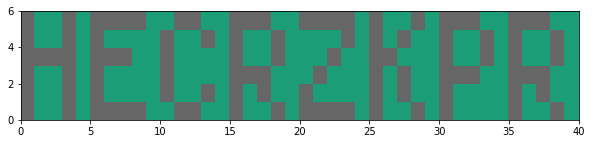

--- 163.9871597290039 milliseconds ---


In [10]:
def create_paper(coords):
    y_max = max(coords, key = lambda x: x[0])[0]+1
    x_max = max(coords, key = lambda x: x[1])[1]+1
    paper = np.zeros((y_max,x_max))
    paper[tuple(np.array(coords).T)] = 1
    return paper


def folding(paper, fold):
    if fold[0] == "y":
        p1, p2 = np.split(paper, [fold[1]])
        p2 = np.flipud(p2[1:])
        p2_y = p2.shape[0]
        start = p1.shape[0]-p2_y
        p1[start:] += p2
        return p1
    else:
        p1, p2 = np.split(paper, [fold[1]], axis=1)
        p2 = np.fliplr(p2[:,1:])
        p2_x = p2.shape[1]
        start = p1.shape[1]-p2_x
        p1[:,start:] += p2
        return p1

def fold_paper(paper, folds):
    for fold in folds:
        paper = folding(paper, fold)
    return paper

def show_code(folded_paper):
    folded_paper[folded_paper>0]=12
    plt.figure(figsize=(10,2))
    plt.pcolor(np.flipud(folded_paper),cmap = 'Dark2')
    plt.show()
        


start_time = time.time()
#preparation
coords, folds = parse_file(data_path)
print(coords)
print(folds)
paper = create_paper(coords)

#part 1
dots = np.count_nonzero(folding(paper, folds[0]))
print("Answer part 1 --> number of dots after first folding: ", dots)

#part 2
print("Answer part 2 --> camera code:")
show_code(fold_paper(paper,folds))

print("--- %s milliseconds ---" % ((time.time() - start_time)*1000))